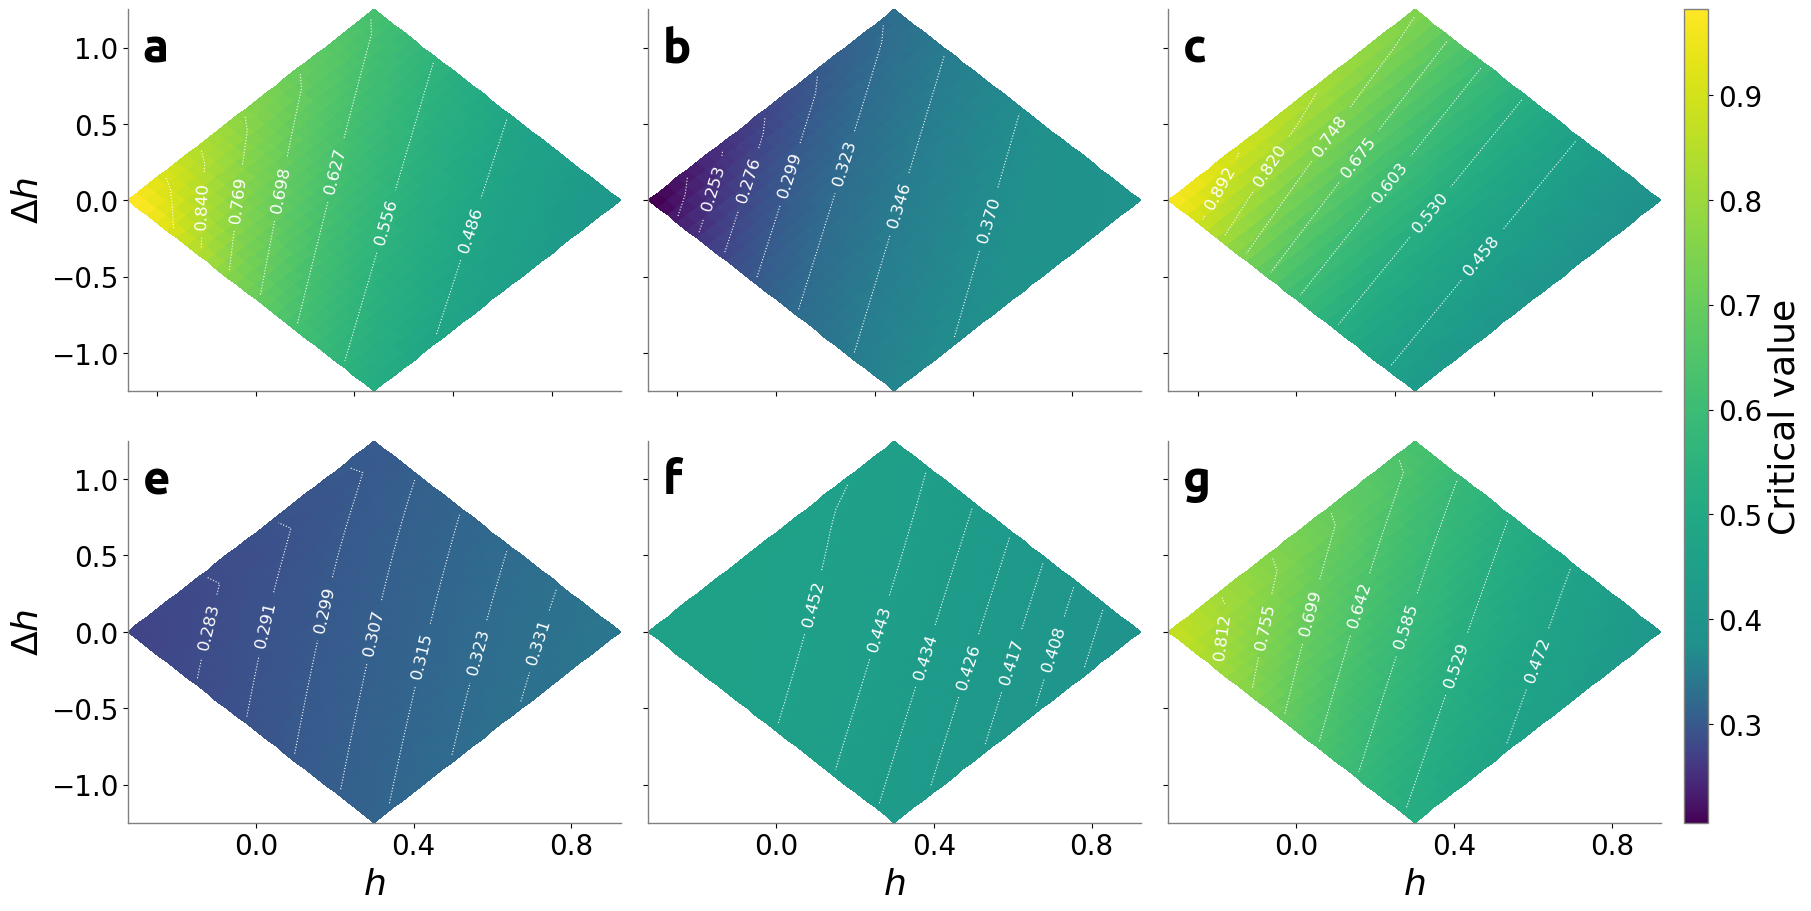

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import FormatStrFormatter

# ----------------------------
# Global Style Tweaks
# ----------------------------
plt.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 24,
    'axes.labelsize': 26,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 18,
    'figure.facecolor': 'white',
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1.0,
    'savefig.dpi': 300
})

# ----------------------------
# Load Datasets
# ----------------------------
file_paths2 = [
    'critical_p_rr_p_bb_0.1_N_4_0.55_prpbrat_1.npy',
    'critical_p_rr_p_bb_0.5_N_4_0.54_prpbrat_1.npy',
    'p_rat02_alph_03critical_p_rr_p_bb_0.2_N_4_0.54_prpbrat_0.1alpha_0.3.npy',

    
]
data_list2 = [np.load('../data/3/'+fp) for fp in file_paths2]

file_paths3 = [
    'critical_vaccination__N_4_0.6_efficacy_1_effintra_0.1alphastar.npy',
    'critical_vaccination__N_4_0.6_efficacy_0.5_effintra_0.1alphastar.npy',
    'critical_vaccination__N_4_0.6_efficacy_0.1_effintra_1alphastar.npy'
]
data_list3 = [np.load('../data/3/'+fp) for fp in file_paths3]

# ----------------------------
# Coordinates & Transformations
# ----------------------------
h2_values = np.linspace(-0.3, 0.9, 25)
h4_values = np.linspace(-0.3, 0.9, 25)
dx = h2_values[1] - h2_values[0]
dy = h4_values[1] - h4_values[0]
h2_edges = np.linspace(h2_values[0] - 0.5 * dx, h2_values[-1] + 0.5 * dx, len(h2_values) + 1)
h4_edges = np.linspace(h4_values[0] - 0.5 * dy, h4_values[-1] + 0.5 * dy, len(h4_values) + 1)
H2_edges, H4_edges = np.meshgrid(h2_edges, h4_edges)
H_edges = 0.5 * (H2_edges + H4_edges)
dH_edges = H2_edges - H4_edges
H2_center, H4_center = np.meshgrid(h2_values, h4_values)
H_center = 0.5 * (H2_center + H4_center)
dH_center = H2_center - H4_center

# ----------------------------
# Normalization
# ----------------------------
vmin = min(map(np.nanmin, data_list2 + data_list3))
vmax = max(map(np.nanmax, data_list2 + data_list3))
norm = TwoSlopeNorm(vmin=vmin, vcenter=0.375, vmax=vmax)

# ----------------------------
# Plotting
# ----------------------------
fig = plt.figure(constrained_layout=True, figsize=(18, 9))
gs = fig.add_gridspec(2, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.05, hspace=0.05)
axes_top = [fig.add_subplot(gs[0, i]) for i in range(3)]
axes_bottom = [fig.add_subplot(gs[1, i]) for i in range(3)]
cax_shared = fig.add_subplot(gs[:, 3])

labels_top = ['a', 'b', 'c']
labels_bottom = ['e', 'f', 'g']


def plot_heatmap(ax, data, label):
    im = ax.pcolormesh(H_edges, dH_edges, data, cmap='viridis', norm=norm, shading='auto')
    levels = np.linspace(np.nanmin(data), np.nanmax(data), 9)
    cs = ax.contour(H_center, dH_center, data, levels=levels, colors='white', linewidths=0.8, linestyles=':')
    ax.clabel(cs, fmt="%.3f", colors='white', fontsize=12)
    ax.set_xlabel(r'$h$', fontfamily="Ubuntu")
    ax.set_ylabel(r'$\Delta h$', fontfamily="Ubuntu")
    ax.text(0.03, 0.96, label, transform=ax.transAxes, fontfamily="Ubuntu",
            fontsize=34, fontweight='bold', va='top', ha='left', color='black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return im

ims = []
for ax, data, label in zip(axes_top, data_list2, labels_top):
    ims.append(plot_heatmap(ax, data, label))
    ax.set_xlabel('')
for ax in axes_top[1:]:
    ax.set_yticklabels([])

for ax, data, label in zip(axes_bottom, data_list3, labels_bottom):
    ims.append(plot_heatmap(ax, data, label))
for ax in axes_bottom[1:]:
    ax.set_yticklabels([])

axes_bottom[0].set_xticks([0, 0.3, 0.6])
for ax in axes_bottom:
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
for ax in axes_top:
    ax.set_xticklabels([])
for ax in [axes_top[1], axes_top[2], axes_bottom[1], axes_bottom[2]]:
    ax.set_ylabel('')

# Shared colorbar with custom formatting
cbar_shared = fig.colorbar(ims[-1], cax=cax_shared, label=r'Critical value')
cbar_shared.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
cbar_shared.ax.set_yscale('linear')

# ----------------------------
# Save & Show
# ----------------------------
os.makedirs('figs', exist_ok=True)
plt.savefig('../results/3_left.pdf', bbox_inches='tight')
plt.show()


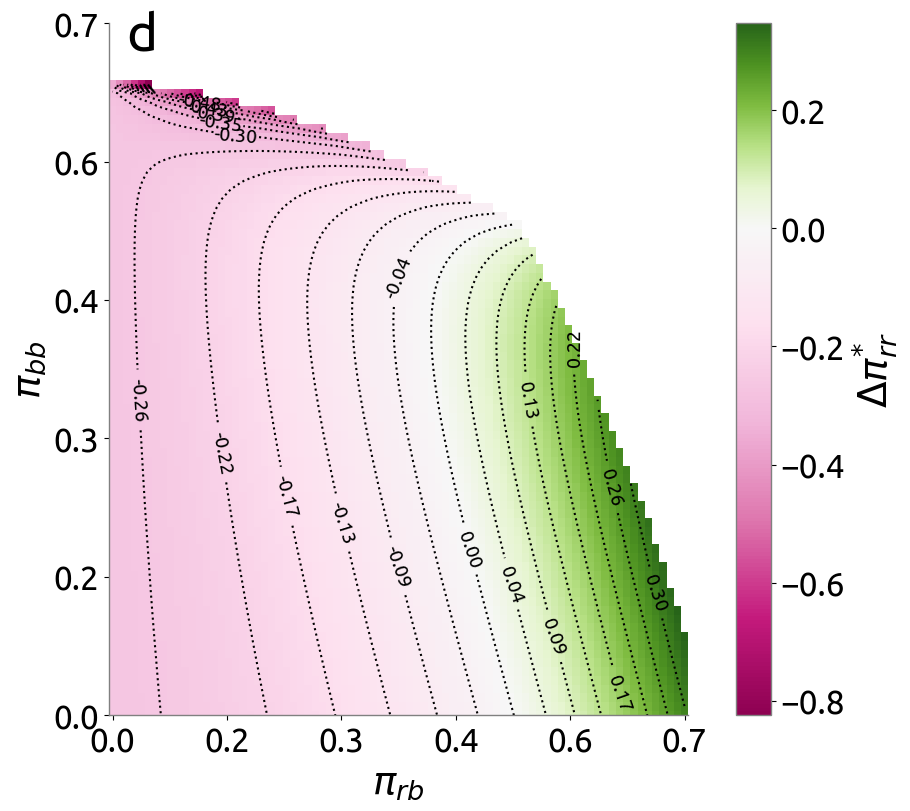

In [7]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import FormatStrFormatter

# ----------------------------
# Set Global Font and Style
# ----------------------------
plt.rcParams.update({
    'font.family': 'Ubuntu',
    'font.size': 20,
    'axes.titlesize': 24,
    'axes.labelsize': 28,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 20,
    'figure.facecolor': 'white',
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1.0,
    'savefig.dpi': 300
})

# ----------------------------
# Load pickle plot data
# ----------------------------
with open('../data/3/area_plot_prb_pbb_homval_0.5.pkl', 'rb') as f:
    prb_values, p_bb_values, results1 = pickle.load(f)
X, Y = np.meshgrid(prb_values, p_bb_values)

# Set up colormap and normalization
cmap1 = plt.get_cmap('PiYG')
norm1 = TwoSlopeNorm(vmin=np.nanmin(results1), vcenter=0, vmax=np.nanmax(results1))

# ----------------------------
# Create Figure for Panel "e"
# ----------------------------
fig, ax_e = plt.subplots(constrained_layout=True, figsize=(9, 8))

mesh_e = ax_e.pcolormesh(X, Y, results1.T, cmap=cmap1, norm=norm1)
contour_levels_e = np.linspace(np.nanmin(results1), np.nanmax(results1), 28)
cs_e = ax_e.contour(X, Y, results1.T, levels=contour_levels_e, colors='black', linewidths=1.5, linestyles='dotted')
ax_e.clabel(cs_e, fmt="%.2f", colors='black', fontsize=14)

ax_e.set_xlabel(r'$\pi_{rb}$', fontfamily='Ubuntu')
ax_e.set_ylabel(r'$\pi_{bb}$', fontfamily='Ubuntu')
ax_e.set_ylim(0.03, 0.7)
ax_e.spines['right'].set_visible(False)
ax_e.spines['top'].set_visible(False)

ax_e.text(0.03, 1.02, "d", fontsize=38, color='black',
          fontfamily="Ubuntu", ha='left', va='top', transform=ax_e.transAxes)

# Add colorbar
cbar_e = fig.colorbar(mesh_e, ax=ax_e, label=r'$\Delta \pi^{*}_{rr}$')
cbar_e.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
cbar_e.ax.set_yscale('linear')


xticks = np.linspace(X.min(), X.max(), 6)
yticks = np.linspace(Y.min(), Y.max(), 6)

ax_e.set_xticks(xticks)
ax_e.set_yticks(yticks)

# Format tick labels to one decimal place
ax_e.set_xticklabels([f"{x:.1f}" for x in xticks])
ax_e.set_yticklabels([f"{y:.1f}" for y in yticks])

# Save and show
os.makedirs('figs', exist_ok=True)
output_file = os.path.join('figs', 'panel_e.pdf')
plt.savefig('../results/3_right.pdf', bbox_inches='tight')
plt.show()
